Which run are you analyzing?  6126


Fit parameters (amplitude, mean, sigma): [9.44674738e+03 5.99814372e+00 4.62617712e-01]


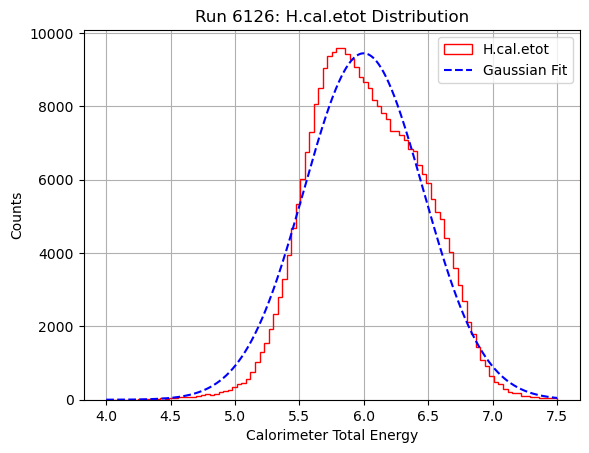

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import uproot

#Defining the gaussian fit
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean)**2) / (2 * stddev**2))

#Taking user input for run number.  This line can be commented out and the filepath be hard-coded in, below.
run_number = input("Which run are you analyzing? ")

#Construct path to ROOT file, opening the ROOT file, extracting the TTree
root_filepath = f"/w/hallc-scshelf2102/c-rsidis/gaskelld/example_output/coin_replay_production_{run_number}_-1.root"
file = uproot.open(root_filepath)
tree = file["T"]

#Variables to extract and analyze
delta = "H.gtr.dp"
cal = "H.cal.etot"
cal2 = "H.cal.etottracknorm"
#H_cer_goodAdcPulseInt = "H.cer.goodAdcPulseInt"

# Extract arrays as NumPy arrays
data = tree.arrays([delta, cal, cal2], library="np")
cal_data = data[cal]
cal2_data = data[cal2]

#Applying cuts on the data.  Change as desired.
data_cuts = cal2_data > 0.8
cal_cut = cal_data[data_cuts]

#Histogram settings and plotting
n_bins = 100
x_min, x_max = 4, 7.5
counts, bin_edges, _ = plt.hist(cal_cut, bins=n_bins, range=(x_min, x_max), histtype="step", color="red", label=cal)

#Compute bin centers, initial guess, and parameters for fitting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
initial_guess = (5000, 6, 0.5)
fit_params, _ = curve_fit(gaussian, bin_centers, counts, p0=initial_guess)

# Plot the fitted Gaussian
x_fit = np.linspace(x_min, x_max, 1000)
y_fit = gaussian(x_fit, *fit_params)
plt.plot(x_fit, y_fit, linestyle="dashed", color="blue", label="Gaussian Fit")

# Display fit parameters
print("Fit parameters (amplitude, mean, sigma):", fit_params)

# Final plot formatting
plt.xlabel("Calorimeter Total Energy")
plt.ylabel("Counts")
plt.legend()
plt.title(f"Run {run_number}: {cal} Distribution")
plt.grid(True)
plt.show()
